In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
dt = pd.read_csv('Unemployment in India.csv')

In [3]:
dt

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dt.dropna(how='all',inplace=True)
dt

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


In [5]:
dt.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

Plotting Estimated unemployment rate for different states.

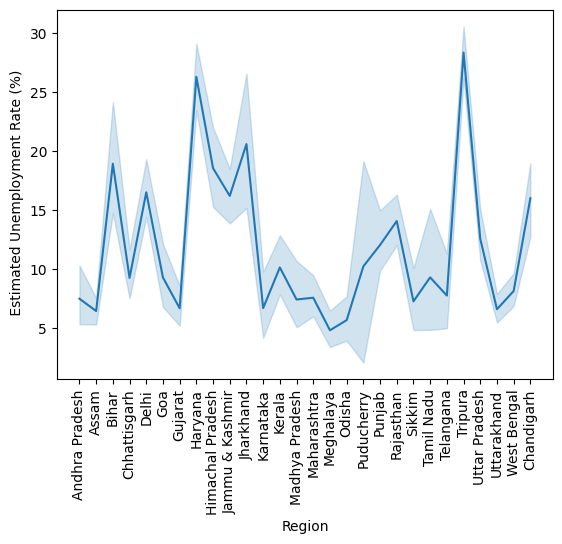

In [6]:
sns.lineplot(data=dt,x='Region',y=' Estimated Unemployment Rate (%)')
plt.xticks(rotation=90)
plt.show()

In [7]:
area_mean = dt.groupby(['Area'],as_index=False)[' Estimated Employed'].mean()

In [8]:
area_mean

,Area,Estimated Employed
0,Rural,1.019285e+07
1,Urban,4.388626e+06


A comparison between Estimated employed in rural and urban areas, in the year 2019 and 2020

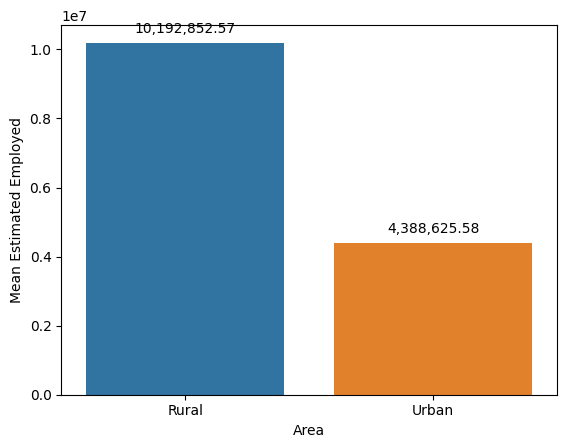

In [9]:
ax=sns.barplot(data=area_mean,x='Area',y=' Estimated Employed')
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xlabel('Area')
plt.ylabel('Mean Estimated Employed')
plt.show()

In [17]:
dt[' Date'] = pd.to_datetime(dt[' Date'])

In [19]:
dt['Year'] = dt[' Date'].dt.year

Year wise comparision between unemployment rate

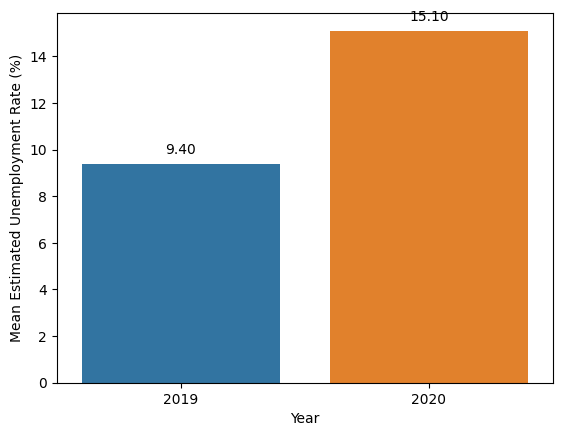

In [24]:
year_mean_unemp = dt.groupby(['Year'],as_index=False)[' Estimated Unemployment Rate (%)'].mean()
ax=sns.barplot(data=year_mean_unemp,x='Year',y=' Estimated Unemployment Rate (%)')
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xlabel('Year')
plt.ylabel('Mean Estimated Unemployment Rate (%)')
plt.show()

We can see that unemployment rate increased from 2019 to 2020.